## 超参数与模型认证 ##

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()       
X = iris.data       
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier         ## 一个k近邻分类器，超参数为n_neighbors=1
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
model.fit(X, y)       
y_model = model.predict(X)

In [4]:
from sklearn.metrics import accuracy_score       
accuracy_score(y, y_model)

1.0

**其实这个方法有个根本缺陷：它用同一套数据训练和评估模型。另外，最近邻模型是一种与距离相关的评估器，只会简单地存储训练数据，然后把新数据与存储的已知数据进行对比来预测标签。在理想情况下，模型的准确率总是 100%。**

**模型验证正确方法：留出集**

In [5]:
from sklearn.model_selection import  train_test_split   # 每个数据集分一半数据       
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,train_size=0.5)       # 用模型拟合训练数据       
model.fit(X1, y1)       # 在测试集中评估模型准确率
y2_model = model.predict(X2)       
accuracy_score(y2, y2_model)

c:\users\willson\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9066666666666666

**二轮交叉检验**

In [6]:
y2_model = model.fit(X1, y1).predict(X2)       
y1_model = model.fit(X2, y2).predict(X1)       
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

**五轮交叉检验**

In [7]:
from sklearn.model_selection import cross_val_score       
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

**我们可能会遇到交叉检验的轮数与样本数相同的极端情况，也就是说我们每次只有一个样本做测试，其他样本全用于训练。这种交叉检验类型被称为LOO（leave-one-out，只留一个）交叉检验**

In [8]:
from sklearn.cross_validation import LeaveOneOut       
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))       
scores

c:\users\willson\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
scores.mean()

0.96

**选择最优模型**

***改善模型能力的高低，是区分机器学习实践者成功与否的标志。***

In [10]:
from sklearn.preprocessing import PolynomialFeatures        
from sklearn.linear_model import LinearRegression        
from sklearn.pipeline import make_pipeline        
def PolynomialRegression(degree=2, **kwargs):            
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [11]:
import numpy as np        
def make_data(N, err=1.0, rseed=1):            # 随机轴样数据            
    rng = np.random.RandomState(rseed)            
    X = rng.rand(N, 1) ** 2            
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:                
        y += err * rng.randn(N)            
        return X, y        
X, y = make_data(40)

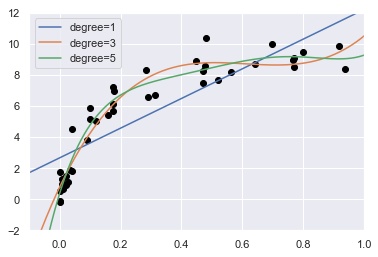

In [12]:
%matplotlib inline        
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 设置图形样式        
X_test = np.linspace(-0.1, 1.1, 500)[:, None]        
plt.scatter(X.ravel(), y, color='black')        
axis = plt.axis()        
for degree in [1, 3, 5]:            
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)            
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))        
    plt.xlim(-0.1, 1.0)        
    plt.ylim(-2, 12)        
    plt.legend(loc='best') 

Text(0, 0.5, 'score')

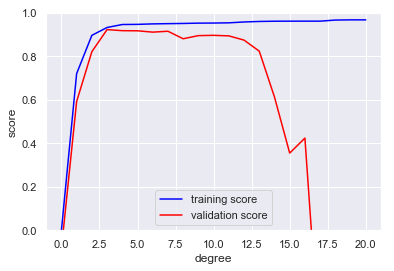

In [13]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,'polynomialfeatures__degree',degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

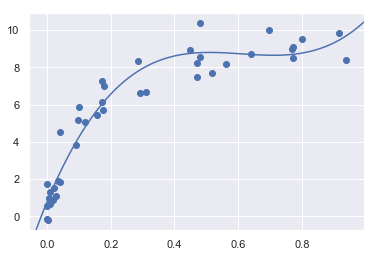

In [14]:
plt.scatter(X.ravel(), y)        
lim = plt.axis()        
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)        
plt.plot(X_test.ravel(), y_test);        
plt.axis(lim);

**利用Scikit-Learn的validation_curve函数就可以非常简单地实现。只要提供模型、数据、参数名称和验证范围信息，函数就会自动计算验证范围内的训练得分和验证得分**

**学习曲线： 反映训练集规模的训练得分 / 验证得分曲线被称为学习曲线（learningcurve）。**

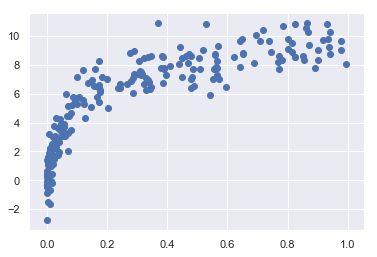

In [15]:
X2, y2 = make_data(200)        
plt.scatter(X2.ravel(), y2);

Text(0, 0.5, 'score')

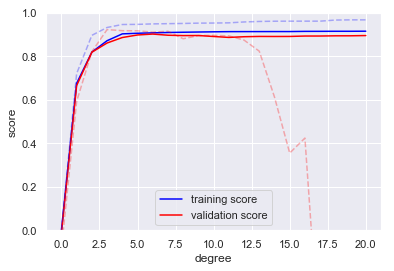

In [16]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,'polynomialfeatures__degree',degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

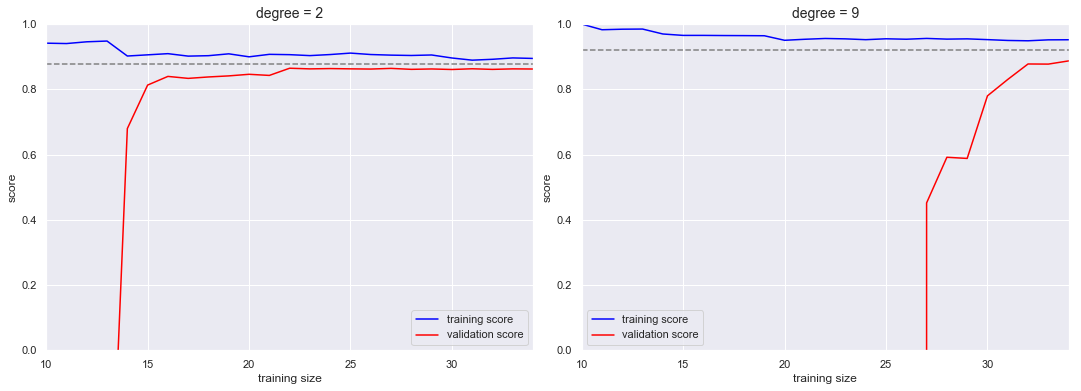

In [17]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):    
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),X, y, cv=7,train_sizes=np.linspace(0.3, 1, 25))    
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')    
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')    
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',linestyle='dashed')    
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])    
    ax[i].set_xlabel('training size')    
    ax[i].set_ylabel('score')    
    ax[i].set_title('degree = {0}'.format(degree), size=14)    
    ax[i].legend(loc='best')

**网格搜索寻找最优多项式回归模型**

In [18]:
from sklearn.model_selection import GridSearchCV        
param_grid = {'polynomialfeatures__degree': np.arange(21),'linearregression__fit_intercept': [True, False],'linearregression__normalize': [True, False]}        
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [19]:
grid.fit(X, y)

GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

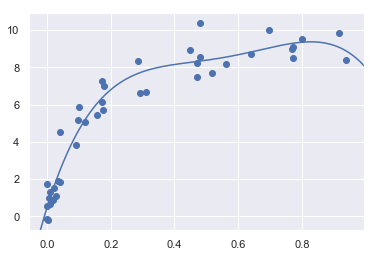

In [22]:
model = grid.best_estimator_      
plt.scatter(X.ravel(), y)        
lim = plt.axis()        
y_test = model.fit(X, y).predict(X_test)        
plt.plot(X_test.ravel(), y_test) #, hold=True)        
plt.axis(lim)